# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E17 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

Enzymes are known to act on molecules with structural similarities with their substrates. This behaviour is called promiscuity. Scientists working in drug discovery use this behaviour to target/design drugs to either block or promote biological actions. But, correct prediction of EC class(s) of substrates associated with enzymes has been a challenge in biology. Since there is no shortage of data, ML techniques can be employed to solve the aforementioned problem.

*Files*

* ```train.csv``` - the training dataset; [EC1 - EC6] are the (binary) targets, although you are only asked to predict EC1 and EC2.
* ```test.csv``` - the test dataset; your objective is to predict the probability of the two targets EC1 and EC2
* ```sample_submission.csv``` - a sample submission file in the correct format


**🟥ES**:

Se sabe que las enzimas actúan sobre moléculas con similitudes estructurales con sus sustratos. Este comportamiento se denomina promiscuidad. Los científicos que trabajan en el descubrimiento de fármacos utilizan este comportamiento para dirigir/diseñar fármacos que bloqueen o promuevan acciones biológicas. Pero la predicción correcta de la clase o clases de sustratos de la CE asociados a enzimas ha sido un reto en biología. Dado que no faltan datos, pueden emplearse técnicas de ML para resolver el problema mencionado.

*Archivos

* ```train.csv``` - el conjunto de datos de entrenamiento; [EC1 - EC6] son los objetivos (binarios), aunque sólo se le pide que prediga EC1 y EC2.
* ```test.csv``` - el conjunto de datos de prueba; su objetivo es predecir la probabilidad de los dos objetivos EC1 y EC2
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

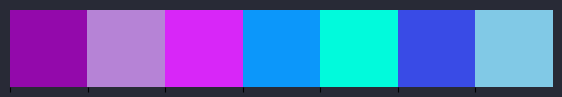

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
RANDOM_STATE = 500

sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e18"
TEST_FILENAME = "test.csv"
TRAIN_FILENAME = "train.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

ORIGINAL_PATH = "/kaggle/input/ec-mixed-class"
DESC_FILENAME = "mixed_desc.csv"
ECFP_FILENAME = "mixed_ecfp.csv"
FCFP_FILENAME = "mixed_fcfp.csv"
# Data dir
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

In [5]:
CIDS = "CIDs"
BERTZCT = "BertzCT"
CHI1 = "Chi1"
CHI1N = "Chi1n"
CHI1V = "Chi1v"
CHI2N = "Chi2n"
CHI2V = "Chi2v"
CHI3V = "Chi3v"
CHI4N = "Chi4n"
ESTATE_VSA1 = "EState_VSA1"
ESTATE_VSA2 = "EState_VSA2"
EXACTMOLWT = "ExactMolWt"
FPDENSITYMORGAN1 = "FpDensityMorgan1"
FPDENSITYMORGAN2 = "FpDensityMorgan2"
FPDENSITYMORGAN3 = "FpDensityMorgan3"
HALLKIERALPHA = "HallKierAlpha"
HEAVYATOMMOLWT = "HeavyAtomMolWt"
KAPPA3 = "Kappa3"
MAXABSESTATEINDEX = "MaxAbsEStateIndex"
MINESTATEINDEX = "MinEStateIndex"
NUMHETEROATOMS = "NumHeteroatoms"
PEOE_VSA10 = "PEOE_VSA10"
PEOE_VSA14 = "PEOE_VSA14"
PEOE_VSA6 = "PEOE_VSA6"
PEOE_VSA7 = "PEOE_VSA7"
PEOE_VSA8 = "PEOE_VSA8"
SMR_VSA10 = "SMR_VSA10"
SMR_VSA5 = "SMR_VSA5"
SLOGP_VSA3 = "SlogP_VSA3"
VSA_ESTATE9 = "VSA_EState9"
FR_COO = "fr_COO"
FR_COO2 = "fr_COO2"
EC1_EC2_EC3_EC4_EC5_EC6 = "EC1_EC2_EC3_EC4_EC5_EC6"

TARGET_EC1 = "EC1"
TARGET_EC2 = "EC2"


In [6]:
target_col = ['EC1', 'EC2']

columns = ['CIDs', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
                   'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
                   'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
                   'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
                   'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
                   'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
                   'fr_COO', 'fr_COO2', 'EC1_EC2_EC3_EC4_EC5_EC6']

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [7]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (20, 15))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    plt.show()

In [8]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [9]:
def show_distance(df, title="Show distance"):
    hierarchy.set_link_color_palette(PALETTE_7_C)
    # Calculate the Spearman correlation matrix
    correlation = df.corr(method='spearman')
    
    # Calculate the distance matrix using the absolute correlation values
    dist = linkage(squareform(1 - abs(correlation)), 'complete')
    
    # Create a new figure for the dendrogram plot
    plt.figure(figsize=(8, 4), dpi=100)
    dn = dendrogram(dist, labels=df.columns, above_threshold_color=PALETTE_3[2], orientation='right')
    hierarchy.set_link_color_palette(None)
    
    plt.title(title, size=20, weight='bold')
    plt.show()

In [10]:
def pie_plot_cat(df: pd.DataFrame, column: str, hover_temp: str = "Status: ",
             palette=None, color=None, title="Target distribution", height=600):
    target = df[column].value_counts(normalize=True).sort_index().round(decimals=3) * 100
    num_values = len(target.index)
    
    if palette is None:
        palette = [LIGTH_BLUE] * num_values  # Set a default color palette
    
    if color is None:
        color = [BLUE] * num_values  # Set a default color list
    
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                         sort=False, showlegend=True,
                         marker=dict(colors=color, line=dict(color=palette, width=2)),
                         hovertemplate="%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                      legend=dict(traceorder='reversed', y=1.05, x=0),
                      uniformtext_minsize=15, uniformtext_mode='hide', height=height)
    fig.show()

In [11]:
## Boolean values only
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET_EC1, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,DARK_BLUE],
            title="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title, 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',height=600)
    fig.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [12]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)

**🟦EN**:

**🟥ES**:

**🟦EN**: Show all the columns of the train dataframe

**🟥ES**: Mustra todas las oclumans del conjunto de datos de entrenamiento

In [13]:
train_df.columns

Index(['id', 'BertzCT', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3v',
       'Chi4n', 'EState_VSA1', 'EState_VSA2', 'ExactMolWt', 'FpDensityMorgan1',
       'FpDensityMorgan2', 'FpDensityMorgan3', 'HallKierAlpha',
       'HeavyAtomMolWt', 'Kappa3', 'MaxAbsEStateIndex', 'MinEStateIndex',
       'NumHeteroatoms', 'PEOE_VSA10', 'PEOE_VSA14', 'PEOE_VSA6', 'PEOE_VSA7',
       'PEOE_VSA8', 'SMR_VSA10', 'SMR_VSA5', 'SlogP_VSA3', 'VSA_EState9',
       'fr_COO', 'fr_COO2', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'],
      dtype='object')

**🟦EN**: Drop id column

**🟥ES**: Eliminamos la columna de id

In [14]:
train_df.drop("id",axis = 1, inplace=True)
test_df.drop("id",axis = 1, inplace=True)

**🟦EN**: Show data description of the train and test dataframe

**🟥ES**: Mostramos una descripción de datos sobre el set de datos de entrenamiento y el de test.

In [15]:
print("Train dataframe description\n")
data_description(train_df)
print("\n\n\n\nTest dataframe description\n")
data_description(test_df)
print("\n\n\n\nOriginal dataframe description\n")
#data_description(original_df)

Train dataframe description

Data description
Total number of records 14838
number of features 37


                 Name     Type  Unique levels  Missing
0             BertzCT  float64           2368        0
1                Chi1  float64           1259        0
2               Chi1n  float64           3157        0
3               Chi1v  float64           3306        0
4               Chi2n  float64           3634        0
5               Chi2v  float64           3725        0
6               Chi3v  float64           3448        0
7               Chi4n  float64           2930        0
8         EState_VSA1  float64            719        0
9         EState_VSA2  float64            445        0
10         ExactMolWt  float64           1666        0
11   FpDensityMorgan1  float64            556        0
12   FpDensityMorgan2  float64            650        0
13   FpDensityMorgan3  float64            654        0
14      HallKierAlpha  float64            388        0
15     HeavyAtomMolW

**🟦EN**: Combine all the datasets to show related informatión

**🟥ES**: Combinamos todos los sets de datos para mostrar información relacionada

In [16]:
labels = ["train", "test"]
comb_df = pd.concat([
    train_df.assign(set=labels[0]),
    test_df.assign(set=labels[1]),
    #original_df.assign(set=labels[2]),
])
comb_df.reset_index(inplace=True)

**🟦EN**: Display heat map to visualize the relationship between columns and their values.

**🟥ES**: Mostrar mapa de calor para visualizar la relación entre las columnas y sus valores.

/tmp/ipykernel_21/1203412792.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


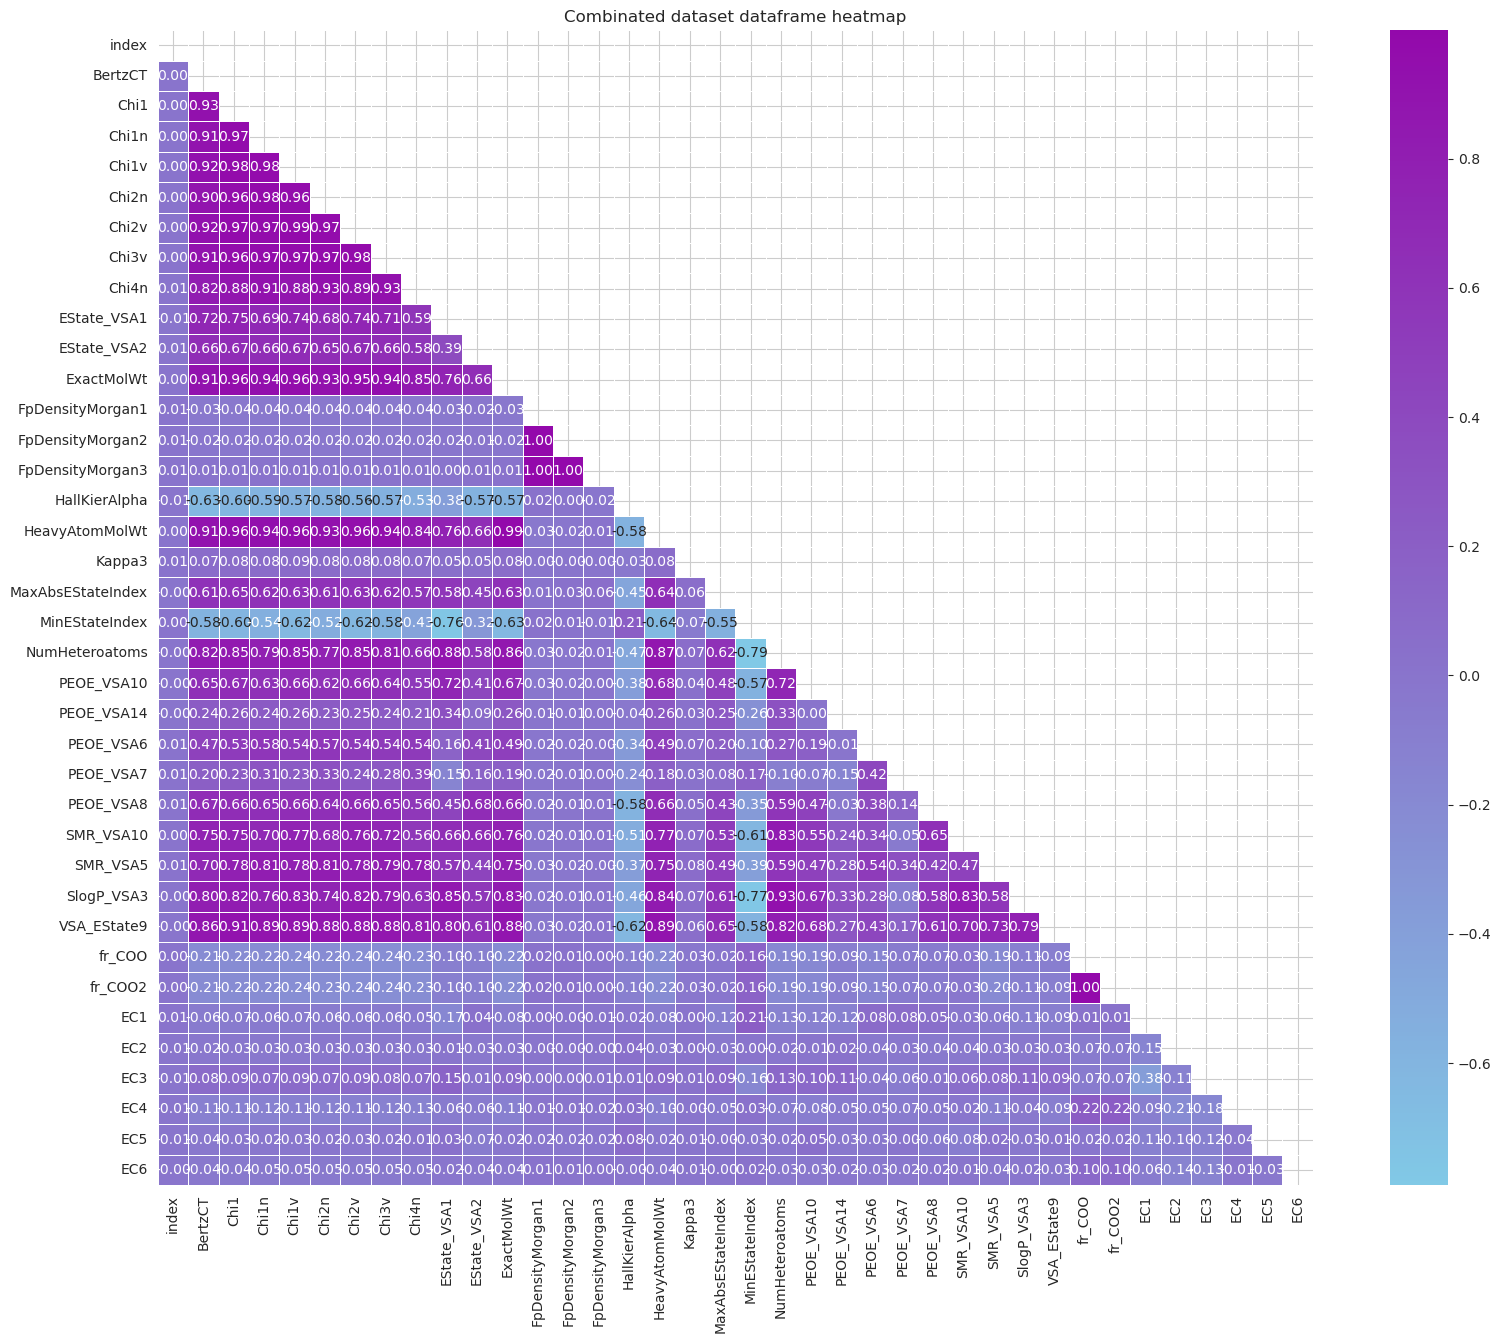

None

In [17]:
display(show_corr_heatmap(comb_df, "Combinated dataset dataframe heatmap"))

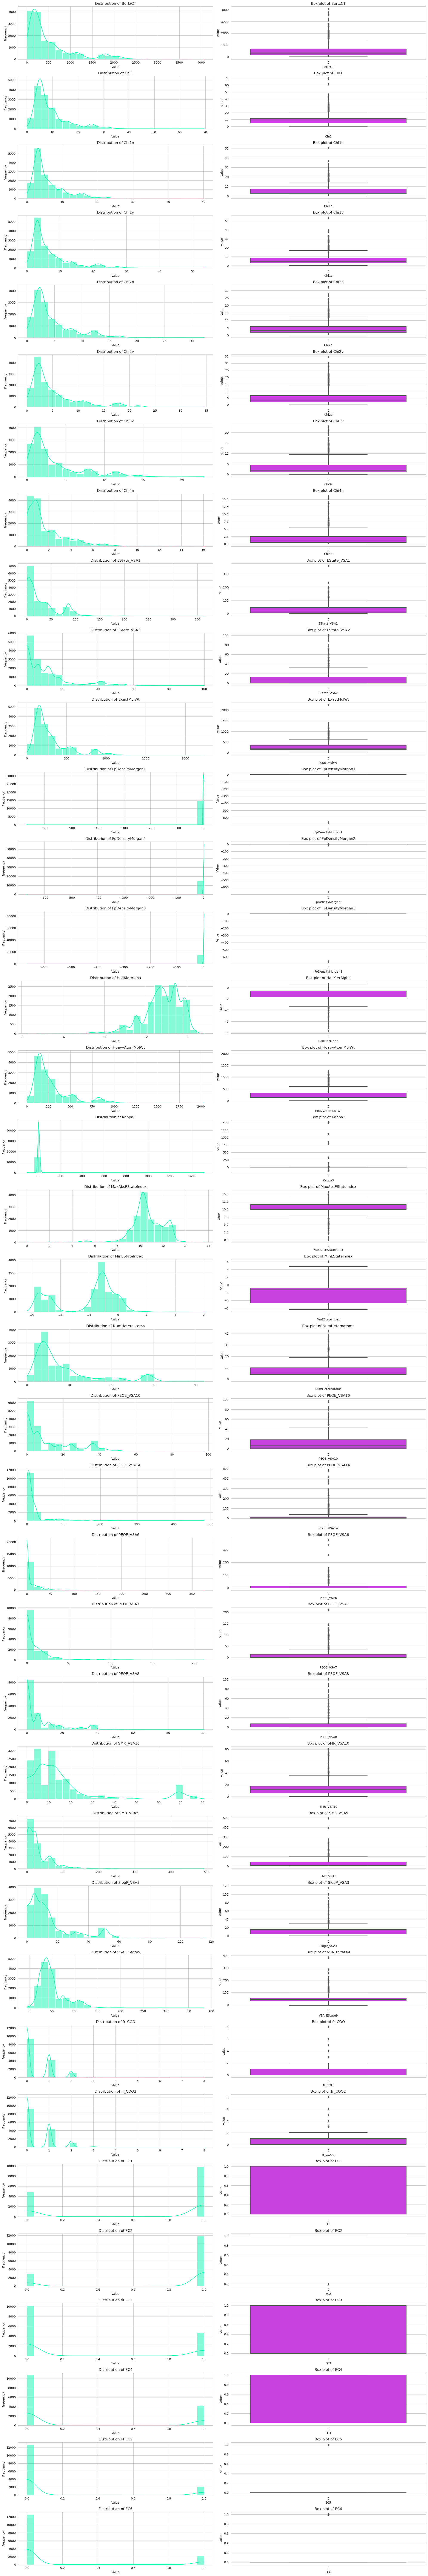

In [18]:
num_columns = train_df.select_dtypes(include=[float, int]).columns.tolist()

fig, axes = plt.subplots(len(num_columns), 2, figsize=(20, 120))

for x, col in enumerate(num_columns):
    sns.histplot(train_df[col], bins=25,kde=True, ax=axes[x, 0], color = PALETTE_2[0])
    axes[x, 0].set_xlabel("Value")
    axes[x, 0].set_ylabel("Frequency")
    axes[x, 0].set_title(f"Distribution of {col}")
                         
    sns.boxplot(train_df[col], ax=axes[x, 1], color = PALETTE_2[1])
    axes[x, 1].set_xlabel(col)
    axes[x, 1].set_ylabel("Value")
    axes[x, 1].set_title(f"Box plot of {col}")
    
plt.tight_layout()
plt.show()

In [19]:
display(pie_plot(df = train_df, feature=TARGET_EC1, title=f"Target distribution of {TARGET_EC1} in train_df"))
display(pie_plot(df = train_df, feature=TARGET_EC2, title=f"Target distribution of {TARGET_EC2} in train_df"))

None

None

### This notebook is under development, I would appreciate a comment with your opinion and things to improve.